In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import pandas as pd
from PIL import Image

from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import torchvision as tv
from torchvision.transforms import v2
from torchvision.transforms.v2.functional import to_pil_image

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from dataset import load_all
from arch import RoadSegmentationModel

In [4]:
X_train, Y_train = load_all()

In [5]:
train_dataset = TensorDataset(X_train, Y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [6]:
model = RoadSegmentationModel(
    in_channels=3, out_channels=1,
    num_filters=16, dropout=0.07
)

In [9]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.BCEWithLogitsLoss()

In [10]:
lossi = []

In [16]:
%%time

def train():
    model.train()
    for epoch in range(8):
        epoch_loss = 0.0
        b = 0
        for images, masks in train_loader:
            optimizer.zero_grad()
            
            logits = model(images)
            loss = loss_fn(logits, masks)
            
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
    
            b += 1
            # print(f"{b}:", loss.item())
    
        epoch_loss /= len(train_loader)
        lossi.append(epoch_loss)
        
        print(f"Epoch {epoch + 1}, Loss: {epoch_loss}")
    print("Done")

train()

Epoch 1, Loss: 0.23244286328554153
Epoch 2, Loss: 0.21974401641637087
Epoch 3, Loss: 0.20959704089909792
Epoch 4, Loss: 0.19940566085278988
Epoch 5, Loss: 0.1904889028519392
Epoch 6, Loss: 0.18167781550437212
Epoch 7, Loss: 0.17305450607091188
Epoch 8, Loss: 0.16588734090328217
Done
CPU times: user 1h 22min 5s, sys: 27min 12s, total: 1h 49min 17s
Wall time: 29min 48s


In [19]:
# torch.save(model.state_dict(), 'checkpoints/unet_001.chk')

In [8]:
# checkpoint = torch.load('checkpoints/unet_001.chk', weights_only=True)
# model.load_state_dict(checkpoint)

In [20]:
# plt.plot(lossi)

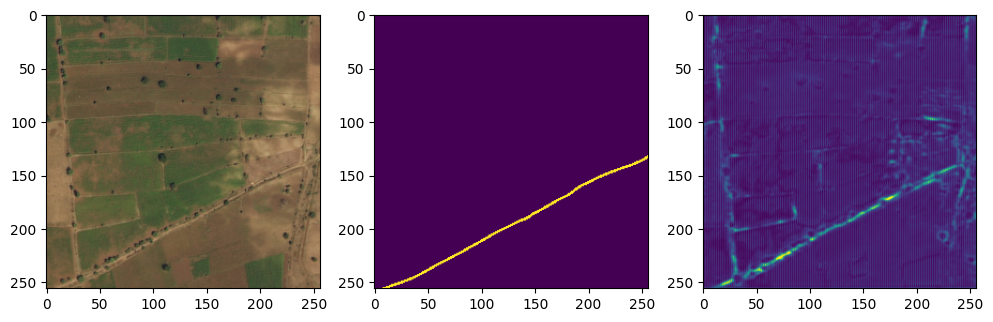

In [45]:
idx = 1

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(to_pil_image(X_train[idx]))

plt.subplot(1,3,2)
plt.imshow(Y_train[idx][0])

plt.subplot(1,3,3)
model.eval()
pred = torch.sigmoid(model(X_train[idx:idx+1]).detach()[0, 0])
plt.imshow(pred)